Project: Reading Data from a Spreadsheet
    
Say you have a spreadsheet of data displaying the vaccination rate for the 4 regions: EMEA, APAC, NOAM, LATAM.
You are given the task of going through its rows to count both the total population and the vaccination rate.
Each row represents a single region.

In this project, we’ll write a script that can read from the vaccination spreadsheet file and calculate statistics 
for each region in a matter of seconds.

This is what our program does:

1. Reads the data from the Excel spreadsheet
2. Counts the vaccination rate for every region
3. Counts the total population of each region
4. Prints the results

This means your code will need to do the following:

1. Open and read the cells of an Excel document with the openpyxl module.
2. Calculate all the vaccination and population data and store it in a data structure.
3. Write the data structure to a text file with the .py extension using the pprint module.

STEP 1: READ THE SPREADSHEET DATA

There is just one sheet in the Vaccination_4_regions.xlsx spreadsheet, named 'Vaccination by region', 
and each row holds the data for a single region. 
The columns are the Region (A), People Vaccinated (B), Population (C), % Vaccination Rate (D)

In [1]:
import openpyxl, pprint
print('Opening workbook...')
wb = openpyxl.load_workbook('Vaccination_4_regions.xlsx')
wb.sheetnames

Opening workbook...


['Vaccination by region']

In [2]:
wb.sheetnames

['Vaccination by region']

In [3]:
sheet = wb['Vaccination by region']

In [4]:
sheet

<Worksheet "Vaccination by region">

In [5]:

print('Reading rows...')
for row in range(2, sheet.max_row + 1):
    people_vaccinated = sheet['B' + str(row)].value
    population = sheet['C' + str(row)].value
    vaccination_rate = sheet['D' + str(row)].value

Reading rows...


In [6]:
#Double check that the values match:
people_vaccinated

'=SUM(B2:B5)'

In [7]:
population

'=SUM(C2:C5)'

In [8]:
#Hmm not sure why the vaccination_rate is not displayed correctly - It should read 31.11 %. 
#NEED TO FIGURE THIS OUT, SETTING THIS ASIDE FOR NOW - DON'T WANT TO BE STUCK HERE FOR TOO LONG
vaccination_rate

'=SUM(D2:D5)'

In [9]:
#A question came up: how long did it take your program to run? Check this out: you can actually find out how long it
#will take your program  to run!
import timeit
code = """import openpyxl, pprint
print('Opening workbook...')
wb = openpyxl.load_workbook('Vaccination_4_regions.xlsx')
sheet = wb['Vaccination by region']
wb.sheetnames
print('Reading rows...')
for row in range(2, sheet.max_row + 1):
    people_vaccinated = sheet['B' + str(row)].value
    population = sheet['C' + str(row)].value
    vaccination_rate = sheet['D' + str(row)].value"""

execution_time = timeit.timeit(code, number=1)

print(execution_time)

Opening workbook...
Reading rows...
0.009478299999999606


The code above imports the openpyxl module, as well as the pprint module that we’ll use to print the final region data.
Then it opens the Vaccination_4_regions.xlsx file, it gets the sheet with the vaccination data and begins iterating 
over its rows

Next we'll create a variable named regionData, which will contain the populations and vaccination rate for each region
and determine exactly how we’ll structure the data inside it.

TO DO: Open a new text file and write the contents of regionData to it.


STEP 2: POPULATE THE DATA STRUCTURE

The data structure stored in regionData will be a dictionary with the 4 region acronyms as its keys. 
Each region name will in turn map to a dictionary with three keys, 'people vaccinated', 'population', and 'vaccination rate'. 


In [10]:
regionData = {
    "Region":
                ["APAC", "EMEA ", "LATAM", "NOAM" ],
    
    "People Vaccinated": 
               ["184,940,823", "102,597,276", "50,386,754", "182891341"],
                                      
    "Population": 
              [4446069143, 2292807221, 430457607, 587934386],
                                    
    "% Vaccination Rate":
               [4.15964792835432, 4.47474497900668, 11.7053928611372, 31.1074407884692],
    
}
       

In [11]:
#Now I can access the values I'm interested in using the properties of python dictionaries
regionData['Region'][1]

'EMEA '

STEP 3: BUILD A DATAFRAME

In [12]:
#Now that we have structured the data into a dictionary, we can build a dataframe
import pandas as pd
df = pd.DataFrame(regionData)

In [13]:
df

,Region,People Vaccinated,Population,% Vaccination Rate
0,APAC,"184,940,823",4446069143,4.159648
1,EMEA,"102,597,276",2292807221,4.474745
2,LATAM,"50,386,754",430457607,11.705393
3,NOAM,182891341,587934386,31.107441


In [14]:
#Since we have a dataframe we can count all rows and colum using the method shape:
df.shape

(4, 4)

STEP 4: PLOT THE DATA INTO A PIE CHART

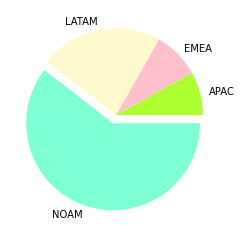

In [15]:
#Now let's see if we can plot the data into a pie chart! Check out the tutorial here: 
#https://www.youtube.com/watch?v=8GdvRNblTqg
import matplotlib.pyplot as plt

# Data to plot
percentages = [4.15, 4.47, 11.7, 31.11]
#percentages = [184940823/4446069143, 102597276/2292807221, 50386754/430457607, 182891341/587934386]
regions = ['APAC', 'EMEA', 'LATAM', 'NOAM']
exp = [0, 0, 0, 0.1] #explode the slice with the maximum data
cl = ['greenyellow', 'pink', 'lemonchiffon', 'aquamarine']
#plt.pie(percentages, labels = regions, explode = exp, colors = cl, autopct ='%2.2f%%', normalize = False)
plt.pie(percentages, labels = regions, explode = exp, colors = cl)
plt.show()


STEP 5: WRITE THE RESULTS TO A FILE

In [16]:
for row in range(2, sheet.max_row + 1):
    people_vaccinated = sheet['B' + str(row)].value
    population = sheet['C' + str(row)].value
    vaccination_rate = sheet['D' + str(row)].value

In [17]:
#Let's call the regionData dictionary to remember what it looks like:
regionData = {
    "Region":
                ["APAC", "EMEA ", "LATAM", "NOAM" ],
    
    "People Vaccinated": 
               ["184,940,823", "102,597,276", "50,386,754", "182891341"],
                                      
    "Population": 
              [4446069143, 2292807221, 430457607, 587934386],
                                    
    "% Vaccination Rate":
               [4.15964792835432, 4.47474497900668, 11.7053928611372, 31.1074407884692],
    
}

At this point we could program more code to write this to a text file or another Excel spreadsheet. For now, 
let’s just use the pprint.pformat() function to write the regionData dictionary value as a massive string to 
a file named vaccinationRate.py. 
    

In [18]:
for row in range(2, sheet.max_row + 1):
    # Open a new text file and write the contents of regionData to it.
    print('Writing results...')
    resultFile = open('vaccinationRate.py', 'w')
    resultFile.write('allData = ' + pprint.pformat(regionData))
    resultFile.close()
    print('Done.')


Writing results...
Done.
Writing results...
Done.
Writing results...
Done.
Writing results...
Done.
Writing results...
Done.


The pprint.pformat() function produces a string that itself is formatted as valid Python code.
By outputting it to a text file named vaccinationRate.py, we’ve generated a Python program from our Python program! 
This may seem complicated, but the advantage is that we can now import vaccinationRate.py just like any other Python module.





In [19]:
import os
import vaccinationRate
vaccinationRate.allData['Region']
APACVax = vaccinationRate.allData['% Vaccination Rate'][0]

print('The vaccination percentage of the APAC region is ' + str(APACVax))

The vaccination percentage of the APAC region is 4.15964792835432


In [20]:
#To understand what's happening above it helps if we displayvaccinationRate.allData
vaccinationRate.allData

{'% Vaccination Rate': [4.15964792835432,
  4.47474497900668,
  11.7053928611372,
  31.1074407884692],
 'People Vaccinated': ['184,940,823',
  '102,597,276',
  '50,386,754',
  '182891341'],
 'Population': [4446069143, 2292807221, 430457607, 587934386],
 'Region': ['APAC', 'EMEA ', 'LATAM', 'NOAM']}

STEP 6: INSERT A PIE CHART INTO AN EXCEL FILE


In [21]:
#Import the data from the original file that Aditya sent:
adityaData_firstTab = pd.read_excel('Aditya.xlsx') #This only reads the first sheet as shown below

In [22]:

adityaData_firstTab

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,NaN,Source : https://ourworldindata.org/covid-vacc...,NaN,NaN,NaN
1,NaN,"* Data as of 22nd May, 2021",NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN
3,NaN,Region,People Vaccinated,Population,% Vaccination Rate
4,NaN,APAC,184940823,4446069143,0.0415965
5,NaN,EMEA,102597276,2292807221,0.0447474
6,NaN,LATAM,50386754,430457607,0.117054
7,NaN,NOAM,182891341,587934386,0.311074
8,NaN,Total,520816194,7757268357,0.0671391


In [23]:
#This reads the sheet named Raw Data 22nd May
adityaData_secondtTab = pd.read_excel('Aditya.xlsx', sheet_name="Raw Data 22nd May")


In [24]:
adityaData_secondtTab

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 50,Unnamed: 51,Unnamed: 52,Unnamed: 53,Unnamed: 54,Unnamed: 55,Unnamed: 56,Unnamed: 57,Unnamed: 58,Unnamed: 59
0,NaN,Source : https://ourworldindata.org/covid-vacc...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,"* Data as of 22nd May, 2021",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,iso_code,continent,location,Country Mapping,people_vaccinated,population,people_vaccinated_per_hundred,total_cases,new_cases,...,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
3,NaN,AFG,Asia,Afghanistan,APAC,NaN,38928341,NaN,65486,406,...,1803.99,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511
4,NaN,ALB,Europe,Albania,EMEA,NaN,2877800,NaN,132176,23,...,11803.4,1.1,304.195,10.08,7.1,51.2,NaN,2.89,78.57,0.795
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
194,NaN,VEN,South America,Venezuela,LATAM,NaN,28435943,NaN,222052,1010,...,16745,NaN,204.85,6.47,NaN,NaN,NaN,0.8,72.06,0.711
195,NaN,VNM,Asia,Vietnam,APAC,NaN,97338583,NaN,5119,178,...,6171.88,2,245.465,6,1,45.9,85.847,2.6,75.4,0.704
196,NaN,YEM,Asia,Yemen,EMEA,NaN,29825968,NaN,6649,17,...,1479.15,18.8,495.003,5.35,7.6,29.2,49.542,0.7,66.12,0.47
197,NaN,ZMB,Africa,Zambia,EMEA,131633,18383956,0.72,93106,186,...,3689.25,57.5,234.499,3.94,3.1,24.7,13.938,2,63.89,0.584


In [25]:
adityaData_thirdTab = pd.read_excel('Aditya.xlsx', sheet_name = 'Country Mapping')

In [26]:
adityaData_thirdTab 

,Unnamed: 0,Unnamed: 1,Unnamed: 2
0,NaN,Find out what the inoculation rate is for the ...,NaN
1,NaN,Display in pie chart. This has been requested ...,NaN
2,NaN,NaN,NaN
3,NaN,Country,Group
4,NaN,Albania,EMEA
...,...,...,...
215,NaN,Sao Tome and Principe,EMEA
216,NaN,Seychelles,EMEA
217,NaN,Sierra Leone,EMEA
218,NaN,South Sudan,EMEA


In [27]:
#Small digression, I just noticed a file I don't need, I am going to remove it
import os
os.remove("vax_chart_pie.xlsx")

For plotting the charts on an excel sheet:
    
    1. Create chart object of specific chart type( i.e Pie chart etc.)
    2. Insert data in it
    3. Add that chart object in the sheet object.

In [28]:
#Check out this tutorial https://www.geeksforgeeks.org/python-plotting-pie-charts-in-excel-sheet-using-xlsxwriter-module/
import xlsxwriter
wb = xlsxwriter.Workbook('Vax_Chart_Pie.xlsx')

In [29]:
wb

In [30]:
# The workbook object is then used to add new  
# worksheet via the add_worksheet() method. 
worksheet = wb.add_worksheet()

In [31]:
# Create a new Format object to formats cells
# in worksheets using add_format() method 
# here we create bold format object 
bold = wb.add_format({'bold': 1})
  

In [32]:
# create a data list .
headings = ['Region', '% Vaccinated People']
  
data = [
    ['APAC', 'EMEA', 'LATAM', 'NOAM'],
    [4.16, 4.47, 11.71, 31.11],
]
  
# Write a row of data starting from 'A1'
# with bold format.
worksheet.write_row('A1', headings, bold)
  
# Write a column of data starting from
# A2, B2 respectively.
worksheet.write_column('A2', data[0])
worksheet.write_column('B2', data[1])
#worksheet.write_column('C2', data[2])
#worksheet.write_column('D2', data[3])
  

0

In [33]:
# Create a chart object that can be added
# to a worksheet using add_chart() method.
  
# here we create a pie chart object .
chart1 = wb.add_chart({'type': 'pie'})

In [34]:
chart1

In [35]:
# Add a data series to a chart
# using add_series method.
# Configure the first series.
#[sheetname, first_row, first_col, last_row, last_col].
chart1.add_series({
   'name': 'Pie vax data',
   'categories':['Sheet1', 1, 0, 4, 0],
   'values':['Sheet1', 1, 1, 4, 1],
})

In [36]:
# Add a chart title 
chart1.set_title({'name': 'Vaccination by the 4 regions'})

In [37]:
# Set an Excel chart style. Colors with white outline and shadow.
chart1.set_style(10)

In [38]:
# Insert the chart into the worksheet(with an offset).
# the top-left corner of a chart is anchored to cell F2. 
worksheet.insert_chart('F2', chart1, {'x_offset': 25, 'y_offset': 10})

In [39]:
# Finally, close the Excel file  
# via the close() method.  
wb.close() 

Check out this tutoril to import multiple excel reports into one report with Python: 

    https://www.youtube.com/watch?v=daeMTChs-r4

Continuing the vaccination project with one more requirement from the executives. 
There are 9 countries that currently have vaccinated (first shot) > 50% of the population according to these
2 reliable, validated and recommended sites:
    
https://graphics.reuters.com/world-coronavirus-tracker-and-maps/vaccination-rollout-and-access/
    
https://ourworldindata.org/covid-vaccinations
    
Our task is to combine the data at the 2 sites above with data from these other 2 sites below to come up with a list of 
international destinations that are safe to travel to with minimal travel restrictions
(level 1 according to the travelstride site and no quarantine according to the need2know site). 

Let's start structuring the data in a dictionary to then build a dataframe from itand do the necessary manipulation/computation

In [44]:
International_Destinations = {
    "Country":
                ["Canada", "Barhain ", "United Kingdom", "Israel", "Chile", "Qatar", "Mongolia", "Hungary"],
    
    "% Vaccination Rate": 
               [64, 62, 62, 60, 61, 56, 51, 54],
                                      
    "Level": 
              [5, 2, 4, 5, 5, 5, 5, 1],
                                    
    "Quarantine Required":
               ["Yes, 14 days", "Yes for non vaccinated people, 10 days", "Yes, 10 days", "Yes, 14 days",  
                "Yes, 10 days", "Yes, 7 days", "Yes, 10 days", "Yes, 10 days"]

}

In [45]:
import pandas as pd

In [46]:
International_Destinations_df = pd.DataFrame(International_Destinations)

In [47]:
International_Destinations_df

,Country,% Vaccination Rate,Level,Quarantine Required
0,Canada,64,5,"Yes, 14 days"
1,Barhain,62,2,"Yes for non vaccinated people, 10 days"
2,United Kingdom,62,4,"Yes, 10 days"
3,Israel,60,5,"Yes, 14 days"
4,Chile,61,5,"Yes, 10 days"
5,Qatar,56,5,"Yes, 7 days"
6,Mongolia,51,5,"Yes, 10 days"
7,Hungary,54,1,"Yes, 10 days"
